In [1]:
import scycle as cc
import scanpy as sc
import numpy as np

import sys
DATA_PATH = '/home/risitop/OneDrive/Documents/PHD/y1/data/EwingSarcoma_Miller2020/'
sys.path.append(DATA_PATH)

In [2]:
## We start from CPM_data.h5ad, which contains CPM_data.txt + Metadata.txt annotations
adata_9 = sc.read_h5ad(DATA_PATH + 'CHLA9.h5ad')

## Computing a cell cycle trajectory estimation on a dataset copy
cc.pp.filter_cells(adata_9, max_counts=50000)
cc.pp.prep_pooling(adata_9)
cc.tl.dimensionality_reduction(adata_9, method="ica")
cc.tl.enrich_components(adata_9, verbose=True)

Preprocessing...
Simulating doublets...
Embedding transcriptomes using PCA...
Calculating doublet scores...
Automatically set threshold at doublet score = 0.72
Detected doublet rate = 0.3%
Estimated detectable doublet fraction = 3.3%
Overall doublet rate:
	Expected   = 10.0%
	Estimated  = 10.2%
Elapsed time: 5.6 seconds
16 doublets encountered
3862 cells pass the doublet and counts filters.
4547  cells pass the mt filter
Cells selected 3806
Preparing embedding...
Embedding for pooling...
Pooling 3806 cells...
Scoring cell cycle...
-- Dimensionality reduction using ICA...
-- Done
--- Selected components:
G1/S: 1 (score=7.225541)
G2/M: 11 (score=10.057556)
G2/M-: 13 (score=6.260389)
Histones: 2 (score=17.232896)
--- Selected components:
G1/S: 1 (score=7.225541)
G2/M: 11 (score=10.057556)
G2/M-: 13 (score=6.260389)
Histones: 2 (score=17.232896)


In [4]:
## We start from CPM_data.h5ad, which contains CPM_data.txt + Metadata.txt annotations
adata_10 = sc.read_h5ad(DATA_PATH + 'CHLA10.h5ad')

## Computing a cell cycle trajectory estimation on a dataset copy
cc.pp.filter_cells(adata_10, max_counts=50000)
cc.pp.prep_pooling(adata_10)
cc.tl.dimensionality_reduction(adata_10, method="ica")
cc.tl.enrich_components(adata_10, verbose=True)

Preprocessing...
Simulating doublets...
Embedding transcriptomes using PCA...
Calculating doublet scores...
Automatically set threshold at doublet score = 0.36
Detected doublet rate = 3.5%
Estimated detectable doublet fraction = 47.0%
Overall doublet rate:
	Expected   = 10.0%
	Estimated  = 7.5%
Elapsed time: 4.9 seconds
162 doublets encountered
3464 cells pass the doublet and counts filters.
4534  cells pass the mt filter
Cells selected 3452
Preparing embedding...
Embedding for pooling...
Pooling 3452 cells...
Scoring cell cycle...
-- Dimensionality reduction using ICA...
-- Done
--- Selected components:
G1/S: 1 (score=8.080797)
G2/M: 2 (score=10.482866)
G2/M-: 6 (score=9.388196)
Histones: 3 (score=16.779298)
--- Selected components:
G1/S: 1 (score=8.080797)
G2/M: 2 (score=10.482866)
G2/M-: 6 (score=9.388196)
Histones: 3 (score=16.779298)


In [5]:
cc.tl.principal_circle(adata_9)
cc.tl.celldiv_moment(adata_9)
cc.tl.remap_nodes(adata_9)
cc.tl.pseudotime(adata_9)
cc.tl.curvature(adata_9)

The initial number of nodes must be at least 3. This will be fixed
Generating the initial configuration
Creating a circle in the plane induced by the 1st and 2nd PCs with 3 nodes
90% of the points have been used as initial conditions. Resetting.
Constructing tree 1 of 1 / Subset 1 of 1
Performing PCA
Using standard PCA
4 dimensions are being used
100.0 % of the original variance has been retained
The elastic matrix is being used. Edge configuration will be ignored
Computing EPG with  30  nodes on  3806  points and  4  dimensions
Nodes =  3 4 5 6 7 8 9 10 11 12 13 14 15 16 17 18 19 20 21 22 23 24 25 26 27 28 29 

BARCODE	ENERGY	NNODES	NEDGES	NRIBS	NSTARS	NRAYS	NRAYS2	MSE	MSEP	FVE	FVEP	UE	UR	URN	URN2	URSD

0||30	0.0002	30	30	30	0	0	0	0.0001	0.0001	0.9323	0.9364	0.0	0.0	0.0004	0.0108	0


1.7314  seconds elapsed
Suggested moment of cell division: [24 25]
Direction of cell cycle: 1
Remapping edges using [24 25] ...
Remapping edges using [0, 1] ...
Calculating pseudotimes for each cell...


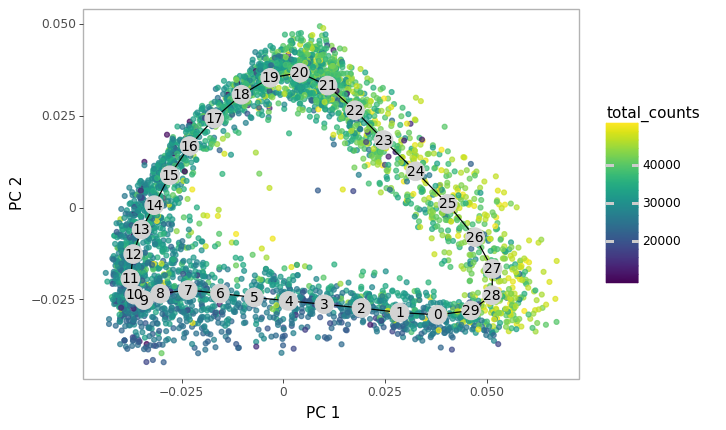

<ggplot: (8753938909672)>

In [6]:
cc.pl.scatter_projection(adata_9, trajectory=True)

In [7]:
cc.tl.principal_circle(adata_10)
cc.tl.celldiv_moment(adata_10)
cc.tl.remap_nodes(adata_10)
cc.tl.pseudotime(adata_10)
cc.tl.curvature(adata_10)

The initial number of nodes must be at least 3. This will be fixed
Generating the initial configuration
Creating a circle in the plane induced by the 1st and 2nd PCs with 3 nodes
90% of the points have been used as initial conditions. Resetting.
Constructing tree 1 of 1 / Subset 1 of 1
Performing PCA
Using standard PCA
4 dimensions are being used
100.0 % of the original variance has been retained
The elastic matrix is being used. Edge configuration will be ignored
Computing EPG with  30  nodes on  3452  points and  4  dimensions
Nodes =  3 4 5 6 7 8 9 10 11 12 13 14 15 16 17 18 19 20 21 22 23 24 25 26 27 28 29 

BARCODE	ENERGY	NNODES	NEDGES	NRIBS	NSTARS	NRAYS	NRAYS2	MSE	MSEP	FVE	FVEP	UE	UR	URN	URN2	URSD

0||30	0.0001	30	30	30	0	0	0	0.0001	0.0001	0.9438	0.9485	0.0	0.0	0.0003	0.0102	0


0.8352  seconds elapsed
Suggested moment of cell division: [ 9 10]
Direction of cell cycle: 1
Remapping edges using [ 9 10] ...
Remapping edges using [0, 1] ...
Calculating pseudotimes for each cell...


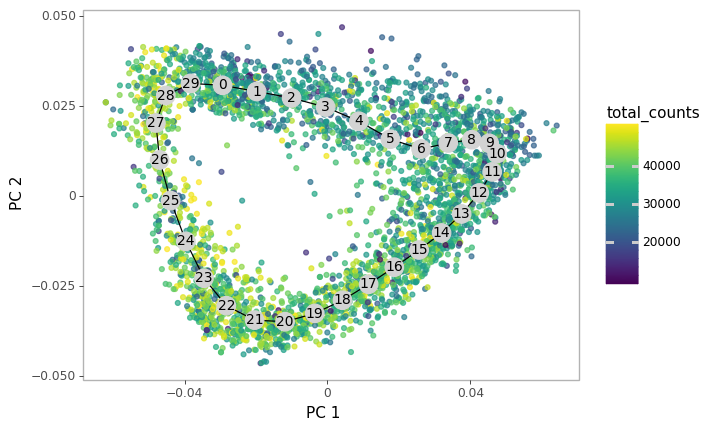

<ggplot: (8753938673137)>

In [8]:
cc.pl.scatter_projection(adata_10, trajectory=True)

In [9]:
cc.tl.integration(adata_10, adata_9, verbose=True, algorithm='woti', 
                  scale_src=0.03, scale_ref=0.03)

-- Automatically detecting cell-cycle components...
-- Integrating datasets...
> Selecting common genes...
> 9227 genes selected.
> Slicing matrices...
> Performing optimal transport based integration using WOTi...
WOTi > Computing source distribution weights...
WOTi > Computing reference distribution weights...
WOTi > Computing optimal transport plan...
WOTi > Projecting source dataset...
-- Done


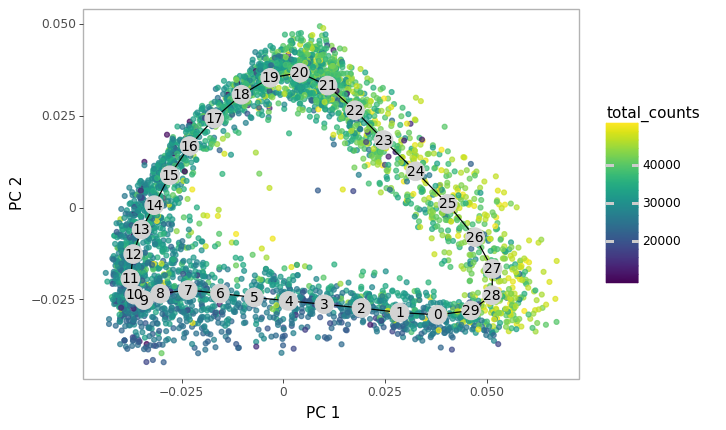

<ggplot: (8753938658786)>

In [10]:
cc.pl.scatter_projection(adata_9, trajectory=True)

In [11]:
cc.tl.principal_circle(adata_10)
cc.tl.celldiv_moment(adata_10)
cc.tl.remap_nodes(adata_10)
cc.tl.pseudotime(adata_10)
cc.tl.curvature(adata_10)

The initial number of nodes must be at least 3. This will be fixed
Generating the initial configuration
Creating a circle in the plane induced by the 1st and 2nd PCs with 3 nodes
90% of the points have been used as initial conditions. Resetting.
Constructing tree 1 of 1 / Subset 1 of 1
Performing PCA
Using standard PCA
4 dimensions are being used
100.0 % of the original variance has been retained
The elastic matrix is being used. Edge configuration will be ignored
Computing EPG with  30  nodes on  3452  points and  4  dimensions
Nodes =  3 4 5 6 7 8 9 10 11 12 13 14 15 16 17 18 19 20 21 22 23 24 25 26 27 28 29 

BARCODE	ENERGY	NNODES	NEDGES	NRIBS	NSTARS	NRAYS	NRAYS2	MSE	MSEP	FVE	FVEP	UE	UR	URN	URN2	URSD

0||30	0.0002	30	30	30	0	0	0	0.0001	0.0001	0.9317	0.9358	0.0	0.0	0.0004	0.012	0


0.8237  seconds elapsed
Suggested moment of cell division: [18 19]
Direction of cell cycle: 1
Remapping edges using [18 19] ...
Remapping edges using [0, 1] ...
Calculating pseudotimes for each cell...


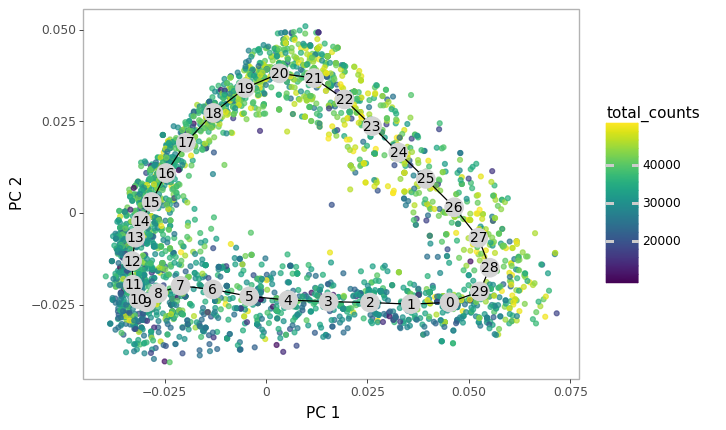

<ggplot: (8753938487796)>

In [12]:
cc.pl.scatter_projection(adata_10, trajectory=True)